# Used Libaries

df_eng dataset download link: https://www.kaggle.com/furqanamjad/pakistan-education-tweets-dataset

df spanish tweets link: https://www.kaggle.com/furqanamjad/spanish-tweets-dataset 

for help please contact: furqan.amjad123@gmail.com
    

We  have attempted for the reproducibility, by performing sentiment analysis on a dataset of English tweets, using VADER    library, and comparing its results with the author’s original code, introduced in the paper, pysentimiento toolkit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import re

### Scrape Tweets

In [2]:
data = pd.read_csv('spanish.csv')
df = data.copy()
df.head()

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,snscrape.modules.twitter.Tweet,https://twitter.com/RafaGarciaPlata/status/148...,2022-01-25 17:38:24+00:00,Mi homenaje a los técnicos publicitarios que c...,Mi homenaje a los técnicos publicitarios que c...,1486030708556681223,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,"['impacto', 'evangelización', 'conversión', 'v...",NaN
1,1,snscrape.modules.twitter.Tweet,https://twitter.com/MktInsiderRev/status/14859...,2022-01-25 12:45:02+00:00,Ogilvy Madrid - @OgilvyES anuncia las promocio...,Ogilvy Madrid - @OgilvyES anuncia las promocio...,1485956879893286918,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['MktInsider', 'marketing', 'agencias', 'publi...",NaN
2,2,snscrape.modules.twitter.Tweet,https://twitter.com/samukortajarena/status/148...,2022-01-17 08:22:47+00:00,Echa un vistazo al último artículo de la #news...,Echa un vistazo al último artículo de la #news...,1482991779460915200,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['newsletter', 'nosoyotrosalmon', 'marketing',...",NaN
3,3,snscrape.modules.twitter.Tweet,https://twitter.com/servilletas/status/1481964...,2022-01-14 12:18:58+00:00,#NOTICIAS #DAKAR #GANADOR #CHILE \n\nChaleco L...,#NOTICIAS #DAKAR #GANADOR #CHILE \n\nChaleco L...,1481964052985360386,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['NOTICIAS', 'DAKAR', 'GANADOR', 'CHILE', 'dak...",NaN
4,4,snscrape.modules.twitter.Tweet,https://twitter.com/ToniNavarroYes/status/1481...,2022-01-13 10:30:17+00:00,Planificación y Medición en Redes Sociales | I...,Planificación y Medición en Redes Sociales | I...,1481574315631988737,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,NaN,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Podcast', 'marketing', 'negocios']",NaN


In [3]:
#X = df.drop(['PassengerId','Survived'], axis=1)
tweet = df[['content','date']]

In [4]:
tweet

,content,date
0,Mi homenaje a los técnicos publicitarios que c...,2022-01-25 17:38:24+00:00
1,Ogilvy Madrid - @OgilvyES anuncia las promocio...,2022-01-25 12:45:02+00:00
2,Echa un vistazo al último artículo de la #news...,2022-01-17 08:22:47+00:00
3,#NOTICIAS #DAKAR #GANADOR #CHILE \n\nChaleco L...,2022-01-14 12:18:58+00:00
4,Planificación y Medición en Redes Sociales | I...,2022-01-13 10:30:17+00:00
...,...,...
995,RT @Pablo_Suarez_T: Títulos originales: 9 Truc...,2017-10-03 09:05:49+00:00
996,RT @Pablo_Suarez_T: Cómo hacer #Inbound #Marke...,2017-10-02 15:06:06+00:00
997,#marketing políticoLaromana yo desde muy tempr...,2017-10-01 14:47:25+00:00
998,Interesante entrevista a Pablo Fernandez de @M...,2017-09-30 15:00:54+00:00


In [5]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    
    return tweet

In [260]:
# string = input(Sentimental)
# #splitting the string
# words = string.split()
# #slicing the list (negative index means index from the end)
# #-1 means the last element of the list
# print(words[2])

In [7]:
tweet['content'] = tweet['content'].apply(clean_tweets)

<ipython-input-7-a30e4df73fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['content'] = tweet['content'].apply(clean_tweets)


In [261]:
tweet.head()

,content,date
0,mi homenaje los tcnicos publicitarios que con ...,2022-01-25 17:38:24+00:00
1,ogilvy madrid anuncia las promociones internas...,2022-01-25 12:45:02+00:00
2,echa un vistazo al ltimo artculo de la newslet...,2022-01-17 08:22:47+00:00
3,noticias dakar ganador chile chaleco lpez juan...,2022-01-14 12:18:58+00:00
4,planificacin medicin en redes sociales invitad...,2022-01-13 10:30:17+00:00


In [263]:
Y = tweet.drop(['date'], axis=1)
X= tweet['content']

In [264]:
Y

,content
0,mi homenaje los tcnicos publicitarios que con ...
1,ogilvy madrid anuncia las promociones internas...
2,echa un vistazo al ltimo artculo de la newslet...
3,noticias dakar ganador chile chaleco lpez juan...
4,planificacin medicin en redes sociales invitad...
...,...
995,rt ttulos originales trucos para escribir con ...
996,rt cmo hacer inbound marketing en tu empresa e...
997,marketing polticolaromana yo desde muy tempran...
998,interesante entrevista pablo fernandez de mark...


In [11]:
numpy_array = tweet['content'].to_numpy()

In [12]:
numpy_array

array(['mi homenaje los tcnicos publicitarios que con tanta gracia tino eligieron la conversin de san pablo como fiesta patronal del gremio impacto evangelizacin conversin visin seguidores no son exclusivos del marketing anglosajn s sanpublicito publicidad ',
       'ogilvy madrid anuncia las promociones internas de miriam miralta guillermo fernndez pablo poveda como nuevos directores creativos la de jorge calvo como nuevo supervisor creativo mktinsider marketing agencias publicidad ',
       'echa un vistazo al ltimo artculo de la newsletter de nosoyotrosalmon pablo escobar la carta de ventas mucho marketing copywritingy una perra labradora que sabe latn en estrategia travs de ',
       'noticias dakar ganador chile chaleco lpez juan pablo latrach se coronaron este viernes como los campeones de la categora de prototipos ligeros del dakar dakar publicidadmarketingmarketingdigitalgra',
       'planificacin medicin en redes sociales invitado especial juan pablo tejela episodio podcast ma

# sentimental_analyzer

In [13]:
from pysentimiento import create_analyzer
sentimental_analyzer = create_analyzer(task="sentiment", lang="es")

In [16]:
Sentimental=sentimental_analyzer.predict(numpy_array)

  0%|          | 0/32 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [191]:
d = pd.DataFrame(Sentimental, columns=['Sentiment_output'])
d

,Sentiment_output
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,..."
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,..."
...,...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,..."
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,..."
997,"AnalyzerOutput(output=NEU, probas={NEU: 0.659,..."
998,"AnalyzerOutput(output=POS, probas={POS: 0.978,..."


In [192]:
d["Content"] = tweet["content"] 

In [193]:
d

,Sentiment_output,Content
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...",mi homenaje los tcnicos publicitarios que con ...
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,...",ogilvy madrid anuncia las promociones internas...
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,...",echa un vistazo al ltimo artculo de la newslet...
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",noticias dakar ganador chile chaleco lpez juan...
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,...",planificacin medicin en redes sociales invitad...
...,...,...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,...",rt ttulos originales trucos para escribir con ...
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,...",rt cmo hacer inbound marketing en tu empresa e...
997,"AnalyzerOutput(output=NEU, probas={NEU: 0.659,...",marketing polticolaromana yo desde muy tempran...
998,"AnalyzerOutput(output=POS, probas={POS: 0.978,...",interesante entrevista pablo fernandez de mark...


In [194]:
d[d['Sentiment_output'].astype(str).str.contains("output=NEU")]

,Sentiment_output,Content
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...",mi homenaje los tcnicos publicitarios que con ...
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,...",ogilvy madrid anuncia las promociones internas...
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,...",echa un vistazo al ltimo artculo de la newslet...
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",noticias dakar ganador chile chaleco lpez juan...
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,...",planificacin medicin en redes sociales invitad...
...,...,...
993,"AnalyzerOutput(output=NEU, probas={NEU: 0.838,...",pablo de la nuez nuevo responsable de publishi...
994,"AnalyzerOutput(output=NEU, probas={NEU: 0.931,...",marketing pablo de la nuez nuevo responsable d...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,...",rt ttulos originales trucos para escribir con ...
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,...",rt cmo hacer inbound marketing en tu empresa e...


# emotion_analyzer

In [160]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/special_tokens_map.json from cache at C:\Users\hp/.cache\huggingface\transformers\d36fe9b59af3e679efca2cfa00cffbc44be132ebc5ef39a61d32f5e60ee37ba2.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/tokenizer_config.json from cache at C:\Users\hp/.cache\huggingface\transformers\e5b58eb4110c09192df285dc3f632cae9b9474d810bb489a651effa5ddb2e2e9.50a2bcf7668df2ff5a82b7b0455533bb4c0db21e6e33565fa20fd7dc8a3be740
loading file https://huggingface.co/pysentimiento/robertuito-emotion-analysis/resolve/main/tokenizer.json from cache at C:\Users\hp/.cache\huggingface\transformers\493237802ea94d02bfc7907883a3298b35a6cbd8d813fd11630c8c5056826a45.0843b07596b388e054bae078721182b4846b9e2

In [161]:
Emotion=emotion_analyzer.predict(numpy_array)

  0%|          | 0/32 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 1000
  Batch size = 32


In [162]:
Emotion

[AnalyzerOutput(output=others, probas={others: 0.705, joy: 0.267, sadness: 0.010, anger: 0.010, disgust: 0.004, surprise: 0.003, fear: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.920, joy: 0.067, surprise: 0.007, fear: 0.002, sadness: 0.001, disgust: 0.001, anger: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.916, joy: 0.072, surprise: 0.009, fear: 0.001, sadness: 0.001, disgust: 0.001, anger: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.785, joy: 0.201, surprise: 0.008, fear: 0.002, sadness: 0.002, disgust: 0.001, anger: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.944, joy: 0.044, surprise: 0.005, sadness: 0.002, anger: 0.002, fear: 0.002, disgust: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.908, joy: 0.080, surprise: 0.006, fear: 0.002, anger: 0.002, sadness: 0.001, disgust: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.969, surprise: 0.013, joy: 0.013, sadness: 0.002, fear: 0.002, anger: 0.001, disgust: 0

In [244]:
a = pd.DataFrame(Emotion, columns=['Emotion_output'])
a

,Emotion_output
0,"AnalyzerOutput(output=others, probas={others: ..."
1,"AnalyzerOutput(output=others, probas={others: ..."
2,"AnalyzerOutput(output=others, probas={others: ..."
3,"AnalyzerOutput(output=others, probas={others: ..."
4,"AnalyzerOutput(output=others, probas={others: ..."
...,...
995,"AnalyzerOutput(output=others, probas={others: ..."
996,"AnalyzerOutput(output=others, probas={others: ..."
997,"AnalyzerOutput(output=others, probas={others: ..."
998,"AnalyzerOutput(output=others, probas={others: ..."


In [245]:
d["Emotion_output"] = a["Emotion_output"] 
d

,Sentiment_output,Content,Emotion_output
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...",mi homenaje los tcnicos publicitarios que con ...,"AnalyzerOutput(output=others, probas={others: ..."
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,...",ogilvy madrid anuncia las promociones internas...,"AnalyzerOutput(output=others, probas={others: ..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,...",echa un vistazo al ltimo artculo de la newslet...,"AnalyzerOutput(output=others, probas={others: ..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",noticias dakar ganador chile chaleco lpez juan...,"AnalyzerOutput(output=others, probas={others: ..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,...",planificacin medicin en redes sociales invitad...,"AnalyzerOutput(output=others, probas={others: ..."
...,...,...,...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,...",rt ttulos originales trucos para escribir con ...,"AnalyzerOutput(output=others, probas={others: ..."
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,...",rt cmo hacer inbound marketing en tu empresa e...,"AnalyzerOutput(output=others, probas={others: ..."
997,"AnalyzerOutput(output=NEU, probas={NEU: 0.659,...",marketing polticolaromana yo desde muy tempran...,"AnalyzerOutput(output=others, probas={others: ..."
998,"AnalyzerOutput(output=POS, probas={POS: 0.978,...",interesante entrevista pablo fernandez de mark...,"AnalyzerOutput(output=others, probas={others: ..."


In [246]:
df_final=d

In [247]:
df_final

,Sentiment_output,Content,Emotion_output
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...",mi homenaje los tcnicos publicitarios que con ...,"AnalyzerOutput(output=others, probas={others: ..."
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,...",ogilvy madrid anuncia las promociones internas...,"AnalyzerOutput(output=others, probas={others: ..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,...",echa un vistazo al ltimo artculo de la newslet...,"AnalyzerOutput(output=others, probas={others: ..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",noticias dakar ganador chile chaleco lpez juan...,"AnalyzerOutput(output=others, probas={others: ..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,...",planificacin medicin en redes sociales invitad...,"AnalyzerOutput(output=others, probas={others: ..."
...,...,...,...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,...",rt ttulos originales trucos para escribir con ...,"AnalyzerOutput(output=others, probas={others: ..."
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,...",rt cmo hacer inbound marketing en tu empresa e...,"AnalyzerOutput(output=others, probas={others: ..."
997,"AnalyzerOutput(output=NEU, probas={NEU: 0.659,...",marketing polticolaromana yo desde muy tempran...,"AnalyzerOutput(output=others, probas={others: ..."
998,"AnalyzerOutput(output=POS, probas={POS: 0.978,...",interesante entrevista pablo fernandez de mark...,"AnalyzerOutput(output=others, probas={others: ..."


In [250]:
df_final.to_csv("df_final.csv")

In [251]:
df

,Content,Label_Sentiment,Label_Emotion
0,mi homenaje los tcnicos publicitarios que con ...,NEU,others
1,ogilvy madrid anuncia las promociones internas...,NEU,others
2,echa un vistazo al ltimo artculo de la newslet...,NEU,others
3,noticias dakar ganador chile chaleco lpez juan...,NEU,others
4,planificacin medicin en redes sociales invitad...,NEU,others
...,...,...,...
995,rt ttulos originales trucos para escribir con ...,NEU,others
996,rt cmo hacer inbound marketing en tu empresa e...,NEU,others
997,marketing polticolaromana yo desde muy tempran...,NEU,others
998,interesante entrevista pablo fernandez de mark...,POS,others


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


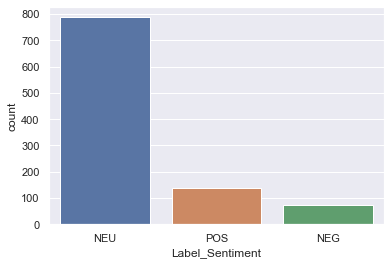

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


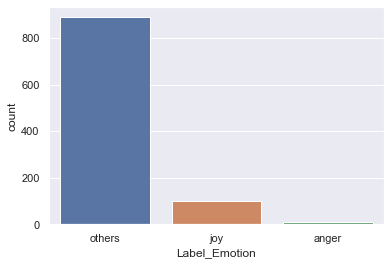

In [210]:
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'df_final.csv')
df['Label_Sentiment'] = df.Sentiment_output.str[22:25]
df['Label_Emotion'] = df.Emotion_output.apply(lambda x: re.findall(r'output=([a-zA-Z]*)',x)[0])

df.drop(['Sentiment_output','Emotion_output','Unnamed: 0'], axis =1, inplace = True)

sns.countplot(df.Label_Sentiment)
plt.show()


sns.countplot(df.Label_Emotion)
plt.show()

In [213]:
type(df.Label_Emotion)

pandas.core.series.Series

In [215]:
df.Label_Emotion.value_counts()

others    889
joy       101
anger      10
Name: Label_Emotion, dtype: int64

In [216]:
df.Label_Sentiment.value_counts()

NEU    788
POS    138
NEG     74
Name: Label_Sentiment, dtype: int64

# English

In [217]:
sentimental_analyzer_en = create_analyzer(task="sentiment", lang="en")

https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\hp\.cache\huggingface\transformers\tmpza0ewdyq


Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/tokenizer_config.json in cache at C:\Users\hp/.cache\huggingface\transformers\61374b71c02fdfd2929a3cdce24c242049e036624e15e18461a3a70cfc35e939.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\61374b71c02fdfd2929a3cdce24c242049e036624e15e18461a3a70cfc35e939.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json not found in cache or force_download set to True, downloading to C:\Users\hp\.cache\huggingface\transformers\tmpqpibu9oa


Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json in cache at C:\Users\hp/.cache\huggingface\transformers\cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
loading configuration file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json from cache at C:\Users\hp/.cache\huggingface\transformers\cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/vocab.txt in cache at C:\Users\hp/.cache\huggingface\transformers\973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to C:\Users\hp\.cache\huggingface\transformers\tmpzsyaqd93


Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes in cache at C:\Users\hp/.cache\huggingface\transformers\0e474c44ff353f3b378fb140e7e6d4431df4ec6142e8b38d584c0dbc5afc3521.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\0e474c44ff353f3b378fb140e7e6d4431df4ec6142e8b38d584c0dbc5afc3521.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to C:\Users\hp\.cache\huggingface\transformers\tmptj8zkol0


Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/added_tokens.json in cache at C:\Users\hp/.cache\huggingface\transformers\fe46927817477a58ec2aa92ef52f8ee6fc9e824d054f4aa6a3c129724dc9c9b7.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\fe46927817477a58ec2aa92ef52f8ee6fc9e824d054f4aa6a3c129724dc9c9b7.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to C:\Users\hp\.cache\huggingface\transformers\tmpt7oi32a2


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/special_tokens_map.json in cache at C:\Users\hp/.cache\huggingface\transformers\9413ac0bed76140860deffa0c5a29ee4da7d49a3810da1b4b51b27f790bc9255.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\9413ac0bed76140860deffa0c5a29ee4da7d49a3810da1b4b51b27f790bc9255.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/vocab.txt from cache at C:\Users\hp/.cache\huggingface\transformers\973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
loading file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes from cache at C:\Users\hp/.cache\huggingface\transformers\0e474c44ff353f3b378fb140e7e6d4431df4e

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/pytorch_model.bin in cache at C:\Users\hp/.cache\huggingface\transformers\2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
creating metadata file for C:\Users\hp/.cache\huggingface\transformers\2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
loading weights file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/pytorch_model.bin from cache at C:\Users\hp/.cache\huggingface\transformers\2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at fi

In [219]:
eng = pd.read_csv('eng_tweets.csv')
df_eng = eng.copy()
df_eng.head()

,Unnamed: 0,Embedded_text,Emojis
0,0,Why do you fear #OpenMerit4BMC? You are not ab...,NaN
1,1,@BrightB59612681 bright Beginnings school syst...,NaN
2,2,“The function of education is to teach one to ...,NaN
3,3,What do you think about schools opening? \n@Sh...,NaN
4,4,Awakened Youth Seminar was conducted by Kuchla...,NaN


In [220]:
df_eng['Embedded_text'] = df_eng['Embedded_text'].apply(clean_tweets)

In [221]:
df_eng.head(12)

,Unnamed: 0,Embedded_text,Emojis
0,0,why do you fear openmeritbmc you are not able ...,NaN
1,1,bright beginnings school system will bring new...,NaN
2,2,the function of education is to teach one to t...,NaN
3,3,what do you think about schools opening shafqa...,NaN
4,4,awakened youth seminar was conducted by kuchla...,NaN
5,5,your gender shouldnt determine whether you get...,NaN
6,6,real education,🖤
7,7,teacher takes hand opens mind and touches hea...,NaN
8,8,replying to and othersnice jocking with people...,NaN
9,9,we focus on the holistic development of our s...,NaN


In [222]:
numpy_array_eng = df_eng['Embedded_text'].to_numpy()

In [223]:
numpy_array_eng

array(['why do you fear openmeritbmc you are not able to compete with the students of your own province having the same education system facilities then you must raise your study standards work hard rather than going against open meritbmcneedpmattention',
       'bright beginnings school system will bring new revolution to education in balochistan our school will implement cambridge international curriculum with the help of cambridge international pakistan office',
       'the function of education is to teach one to think intensively and to think critically intelligence plus character that is the goal of true education martin luther kingsbmkfoundation principles tolerance arguments constructivegender equality',
       'what do you think about schools opening shafqatmehmood exams alevels education schoolsreopening covid covidsecondwave bitcoin onlineexamsonlyclose and online classesopen and offline classes votesfinal results',
       'awakened youth seminar was conducted by kuchlak int

In [224]:
sentimental_eng=sentimental_analyzer_en .predict(numpy_array_eng)

  0%|          | 0/16 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 493
  Batch size = 32


In [225]:
sentimental_eng

[AnalyzerOutput(output=NEG, probas={NEG: 0.748, NEU: 0.247, POS: 0.005}),
 AnalyzerOutput(output=POS, probas={POS: 0.975, NEU: 0.025, NEG: 0.001}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.674, POS: 0.324, NEG: 0.002}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.977, POS: 0.013, NEG: 0.011}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.906, POS: 0.093, NEG: 0.002}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.872, NEG: 0.117, POS: 0.011}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.913, POS: 0.076, NEG: 0.011}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.904, POS: 0.093, NEG: 0.002}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.513, POS: 0.485, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.977, NEU: 0.022, NEG: 0.001}),
 AnalyzerOutput(output=POS, probas={POS: 0.909, NEU: 0.090, NEG: 0.001}),
 AnalyzerOutput(output=POS, probas={POS: 0.627, NEU: 0.371, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.725, NEU: 0.273, NEG: 0.001}),
 AnalyzerOutput(output=NEU, probas={NE

In [237]:
df_final=e['eng_output']
df_final

0      AnalyzerOutput(output=NEG, probas={NEG: 0.748,...
1      AnalyzerOutput(output=POS, probas={POS: 0.975,...
2      AnalyzerOutput(output=NEU, probas={NEU: 0.674,...
3      AnalyzerOutput(output=NEU, probas={NEU: 0.977,...
4      AnalyzerOutput(output=NEU, probas={NEU: 0.906,...
                             ...                        
488    AnalyzerOutput(output=POS, probas={POS: 0.989,...
489    AnalyzerOutput(output=POS, probas={POS: 0.984,...
490    AnalyzerOutput(output=NEG, probas={NEG: 0.978,...
491    AnalyzerOutput(output=NEU, probas={NEU: 0.821,...
492    AnalyzerOutput(output=NEU, probas={NEU: 0.964,...
Name: eng_output, Length: 493, dtype: object

In [228]:
e = pd.DataFrame(sentimental_eng, columns=['eng_output'])
e

,eng_output
0,"AnalyzerOutput(output=NEG, probas={NEG: 0.748,..."
1,"AnalyzerOutput(output=POS, probas={POS: 0.975,..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.674,..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.977,..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.906,..."
...,...
488,"AnalyzerOutput(output=POS, probas={POS: 0.989,..."
489,"AnalyzerOutput(output=POS, probas={POS: 0.984,..."
490,"AnalyzerOutput(output=NEG, probas={NEG: 0.978,..."
491,"AnalyzerOutput(output=NEU, probas={NEU: 0.821,..."


In [254]:
df_final["sentimental_eng"] = e["eng_output"] 
df_final

,Sentiment_output,Content,Emotion_output,sentimental_eng
0,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...",mi homenaje los tcnicos publicitarios que con ...,"AnalyzerOutput(output=others, probas={others: ...","AnalyzerOutput(output=NEG, probas={NEG: 0.748,..."
1,"AnalyzerOutput(output=NEU, probas={NEU: 0.913,...",ogilvy madrid anuncia las promociones internas...,"AnalyzerOutput(output=others, probas={others: ...","AnalyzerOutput(output=POS, probas={POS: 0.975,..."
2,"AnalyzerOutput(output=NEU, probas={NEU: 0.809,...",echa un vistazo al ltimo artculo de la newslet...,"AnalyzerOutput(output=others, probas={others: ...","AnalyzerOutput(output=NEU, probas={NEU: 0.674,..."
3,"AnalyzerOutput(output=NEU, probas={NEU: 0.707,...",noticias dakar ganador chile chaleco lpez juan...,"AnalyzerOutput(output=others, probas={others: ...","AnalyzerOutput(output=NEU, probas={NEU: 0.977,..."
4,"AnalyzerOutput(output=NEU, probas={NEU: 0.947,...",planificacin medicin en redes sociales invitad...,"AnalyzerOutput(output=others, probas={others: ...","AnalyzerOutput(output=NEU, probas={NEU: 0.906,..."
...,...,...,...,...
995,"AnalyzerOutput(output=NEU, probas={NEU: 0.948,...",rt ttulos originales trucos para escribir con ...,"AnalyzerOutput(output=others, probas={others: ...",NaN
996,"AnalyzerOutput(output=NEU, probas={NEU: 0.941,...",rt cmo hacer inbound marketing en tu empresa e...,"AnalyzerOutput(output=others, probas={others: ...",NaN
997,"AnalyzerOutput(output=NEU, probas={NEU: 0.659,...",marketing polticolaromana yo desde muy tempran...,"AnalyzerOutput(output=others, probas={others: ...",NaN
998,"AnalyzerOutput(output=POS, probas={POS: 0.978,...",interesante entrevista pablo fernandez de mark...,"AnalyzerOutput(output=others, probas={others: ...",NaN


In [255]:
df_final.to_csv("df_final.csv")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


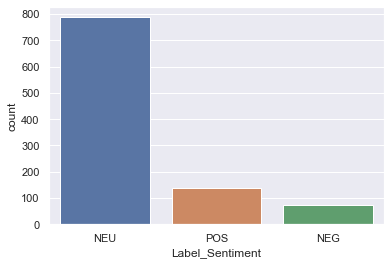

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


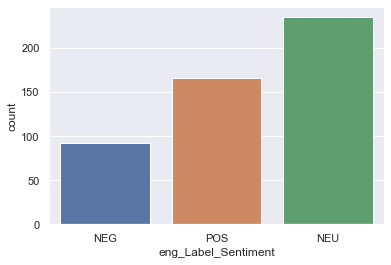

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


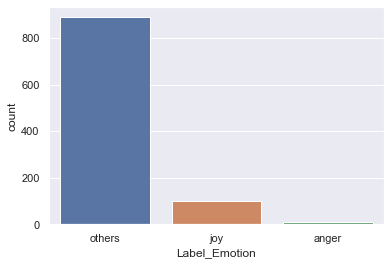

In [258]:
import pandas as pd
import regex as re    
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'df_final.csv')
df['Label_Sentiment'] = df.Sentiment_output.str[22:25]
df['Label_Emotion'] = df.Emotion_output.apply(lambda x: re.findall(r'output=([a-zA-Z]*)',x)[0])

df['eng_Label_Sentiment'] = df.sentimental_eng.str[22:25]
#df['Label_Emotion'] = df.Emotion_output.apply(lambda x: re.findall(r'output=([a-zA-Z]*)',x)[0])

df.drop(['Sentiment_output','Emotion_output','Unnamed: 0'], axis =1, inplace = True)

sns.countplot(df.Label_Sentiment)
plt.show()


sns.countplot(df.eng_Label_Sentiment)
plt.show()

sns.countplot(df.Label_Emotion)
plt.show()

In [259]:
df.eng_Label_Sentiment.value_counts()

NEU    235
POS    166
NEG     92
Name: eng_Label_Sentiment, dtype: int64

# Sentimental using Vader Libary

In [268]:
df_eng

,Unnamed: 0,Embedded_text,Emojis
0,0,why do you fear openmeritbmc you are not able ...,NaN
1,1,bright beginnings school system will bring new...,NaN
2,2,the function of education is to teach one to t...,NaN
3,3,what do you think about schools opening shafqa...,NaN
4,4,awakened youth seminar was conducted by kuchla...,NaN
...,...,...,...
488,488,make us more proud girlsinfeaahan ramshakhan,❤
489,489,nothing just my girl squad making us so prouds...,😭 ❤
490,490,girl sorry dont like you girl bhai,💥
491,491,national profile picture of girls on instagram,🤭 😂


In [272]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [273]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [274]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))      
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [277]:
df_eng['STOPWORD']=df_eng['Embedded_text'].apply(lambda x:' '.join([word for word in x.split()if word not in (stops)]))

In [279]:
df_eng['STOPWORD'].head()

0    fear openmeritbmc able compete students provin...
1    bright beginnings school system bring new revo...
2    function education teach one think intensively...
3    think schools opening shafqatmehmood exams ale...
4    awakened youth seminar conducted kuchlak intel...
Name: STOPWORD, dtype: object

In [281]:
df_eng[['Embedded_text']].head()

,Embedded_text
0,why do you fear openmeritbmc you are not able ...
1,bright beginnings school system will bring new...
2,the function of education is to teach one to t...
3,what do you think about schools opening shafqa...
4,awakened youth seminar was conducted by kuchla...


In [282]:
col_list=['Cleaned','STOPWORD']

In [284]:
from nltk.corpus import sentiwordnet as swn
#from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [285]:
sid=SentimentIntensityAnalyzer()

In [286]:
df_eng['VaderValues']=df_eng['STOPWORD'].apply(lambda x: sid.polarity_scores(x))

In [288]:
df_eng['VaderValues'].head()

0    {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...
1    {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...
2    {'neg': 0.094, 'neu': 0.625, 'pos': 0.281, 'co...
3    {'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...
4    {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...
Name: VaderValues, dtype: object

In [289]:
df_eng['VaderScore']=df_eng['VaderValues'].apply(lambda x: x['compound'])

In [290]:
df_eng['VaderScore']=df_eng['VaderScore'].apply(lambda score: 'positive' if score >= 0.05 else('negative' if score <= -0.05  else 'neutral')) 

In [291]:
df_eng['VaderScore']

0      negative
1      positive
2      positive
3      negative
4      positive
         ...   
488    positive
489     neutral
490    negative
491     neutral
492     neutral
Name: VaderScore, Length: 493, dtype: object

In [292]:
df_eng=df_eng.drop(columns='VaderValues', axis=0)

In [293]:
df_eng

,Unnamed: 0,Embedded_text,Emojis,STOPWORD,VaderScore
0,0,why do you fear openmeritbmc you are not able ...,NaN,fear openmeritbmc able compete students provin...,negative
1,1,bright beginnings school system will bring new...,NaN,bright beginnings school system bring new revo...,positive
2,2,the function of education is to teach one to t...,NaN,function education teach one think intensively...,positive
3,3,what do you think about schools opening shafqa...,NaN,think schools opening shafqatmehmood exams ale...,negative
4,4,awakened youth seminar was conducted by kuchla...,NaN,awakened youth seminar conducted kuchlak intel...,positive
...,...,...,...,...,...
488,488,make us more proud girlsinfeaahan ramshakhan,❤,make us proud girlsinfeaahan ramshakhan,positive
489,489,nothing just my girl squad making us so prouds...,😭 ❤,nothing girl squad making us proudsinfeaahan,neutral
490,490,girl sorry dont like you girl bhai,💥,girl sorry dont like girl bhai,negative
491,491,national profile picture of girls on instagram,🤭 😂,national profile picture girls instagram,neutral


In [294]:
df_eng['VaderScore'].value_counts()

positive    257
neutral     138
negative     98
Name: VaderScore, dtype: int64

<AxesSubplot:xlabel='VaderScore', ylabel='count'>

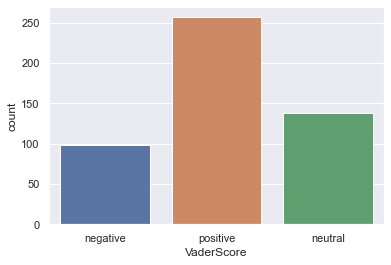

In [295]:
sns.countplot(x='VaderScore',data=df_eng) 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


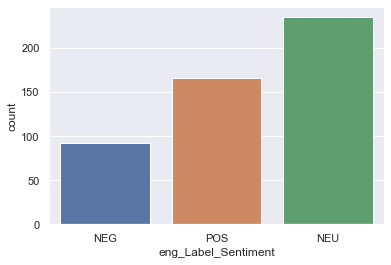

In [296]:
sns.countplot(df.eng_Label_Sentiment)
plt.show()

Here Is the difference between them,

Using Vader and Pysentimento Results are different in english text sentiments